In [4]:
import GPy
import pods
verbose=1

data = pods.datasets.olivetti_faces()
Q = 2
Y = data['Y']
Yn = Y - Y.mean()
Yn /= Yn.std()
m = GPy.models.BayesianGPLVM(Yn, Q, num_inducing=20)

In [1]:
import GPy
import pods
verbose=1

data = pods.datasets.olivetti_faces()

In [2]:
Y = data['Y']

In [3]:
Y

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s04  0008   3.731958e+06   1.332132e+07 
    06s42  0024   3.732552e+06   4.247496e+07 
    11s96  0044   3.730859e+06   1.034533e+06 
    37s62  0132   3.727264e+06   9.899440e+06 
 01m49s92  0376   3.723769e+06   8.966431e+05 
 03m45s51  0760   3.720277e+06   1.629038e+06 
 04m58s95  1002   3.719394e+06   4.912264e+04 
Runtime:  04m58s95
Optimization status: Maximum number of f evaluations reached



 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


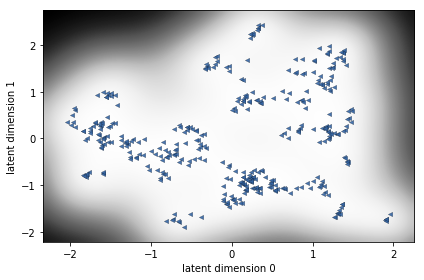

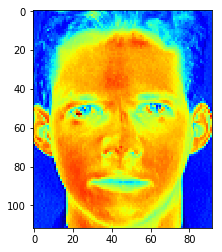

In [8]:
m.optimize('bfgs', messages=verbose, max_iters=1000)
ax = m.plot_latent(which_indices=(0, 1))
y = m.Y[0, :]
data_show = GPy.plotting.matplot_dep.visualize.image_show(y[None, :], dimensions=(112, 92), transpose=False, invert=False, scale=False)
lvm = GPy.plotting.matplot_dep.visualize.lvm(m.X.mean[0, :].copy(), m, data_show, ax)